In [48]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize, fsolve
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('default')
import copy
from consts import *
fontsize = 15

In [49]:
from sympy import symbols, diff, ln

# 定义符号
r, A4, B4, mu_4, J_z = symbols('r A4 B4 mu_4 J_z')

# 定义函数
A4_r = A4 + B4 * ln(r) - (1/4) * mu_4 * J_z * r**2

# 求一阶导数
dA4_dr = diff(A4_r, r)

# 求二阶导数
d2A4_dr2 = diff(dA4_dr, r)

d2A4_dr2

dA4_dr

B4/r - 0.5*J_z*mu_4*r

In [50]:
def cal_area(r1, r2):
    return np.pi * (r2**2 - r1**2)

r1 = 0.0053
r2 = 0.0063
r3 = 0.0101
r4 = 0.0111
area_in = cal_area(r1, r2)
Jz_in = 100 / area_in
area_out = cal_area(r3, r4)
Jz_out = 100 / area_out
print(Jz_in, Jz_out)

2744050.7429637127 1501461.7272820305


In [51]:
0.85722*0.0115

0.00985803

# (r3, r4)

B04 -0.00011626941998447632
A04 -0.0005814412979955557
B4[0] 1.9807699353120034
A4[0] 0.9740710810437146


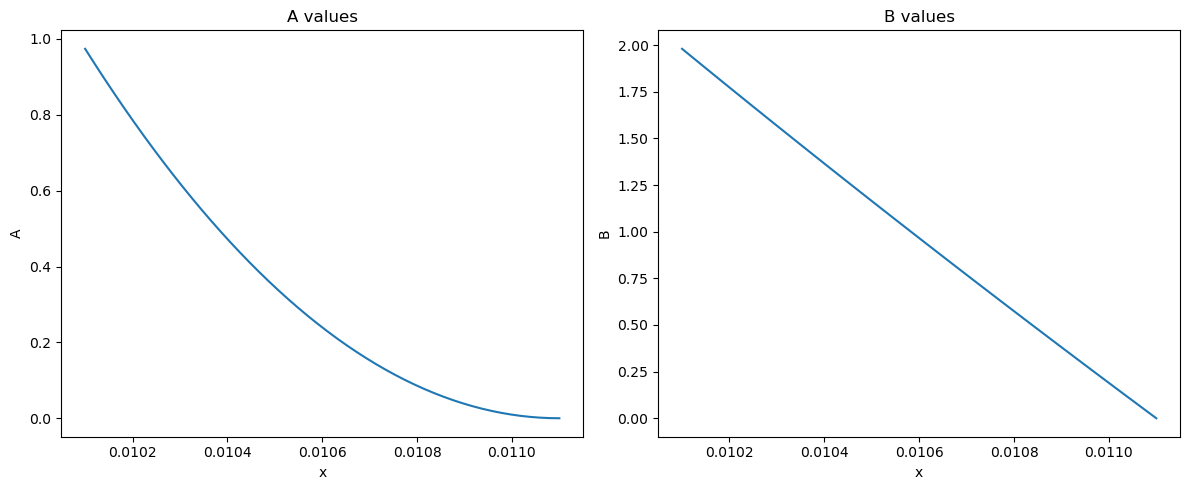

In [52]:
mu_4_val = 1
mu0 = 1.257*10**-6# H/m
J4_z_val = -Jz_out
r4 = consts["r4"]
r3 = consts["r3"]
def B4_func(r):
    B4 = - B04/ r + 0.5 * J4_z_val * mu_4_val * mu0* r
    return B4 * 1000

def solve_B04():
    B04 =  0.5 * J4_z_val * mu_4_val * mu0 * r4**2 
    return B04 

def A4_func(r):
    A4 = A04 + B04* np.log(r) - (1/4) * mu_4_val * mu0* J4_z_val * r**2
    return A4 * 1e6

def solve_A04(r):
    A04= -B04* np.log(r) + (1/4) * mu_4_val * mu0 * J4_z_val * r**2 
    return A04
    

B04= solve_B04()
print("B04", B04)
A04= solve_A04(r4)
print("A04", A04)



x_34 = np.linspace(r3, r4)
B4_val = B4_func(x_34)
A4_val = A4_func(x_34)

print("B4[0]", B4_val[0])
print("A4[0]", A4_val[0])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_34, A4_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_34, B4_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


# (r2, r3)

B4_val[0] 1.9807699353120034
B03 -0.00020005776346651235
0.9740710810437146
A03 -0.0009183353357741599
B3: 31.75520055024006 19.807699353120036
A3: 95.39849270639002 0.9740710810436605


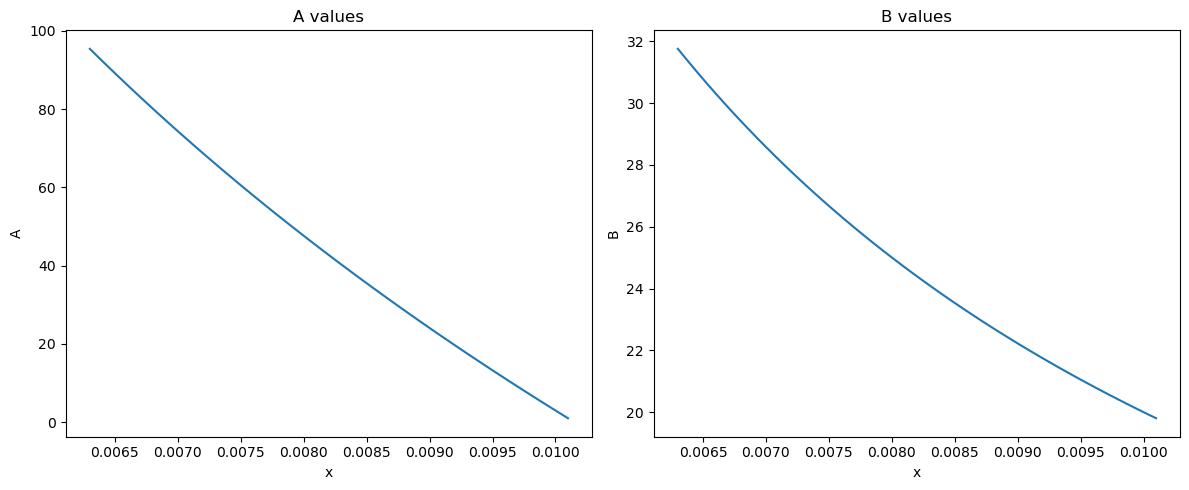

In [53]:
mu_3_val = 10
mu0 = 1.257*10**-6# H/m
J_z_val = 0
r2 = consts["r2"]
def B3_func(r):
    B3 = -B03 / r 
    return B3 * 1000

def solve_B03():
    # B3 =  0.5 * J_z_val * mu_3_val * mu0* 0.0125**2 
    B03 = -r3 * B4_val[0] * mu_3_val  / 1000
    print("B4_val[0]", B4_val[0])
    return B03

def A3_func(r):
    A3 = A03 + B03 * np.log(r)
    return A3 * 1e6

def solve_A03():
    # A3 = 1.740e-6 - B03* np.log(r)
    print(A4_val[0])
    A03 = A4_val[0]/1e6 * 1 - B03* np.log(r3)
    return A03

B03 = solve_B03()
print("B03", B03)
A03 = solve_A03()
print("A03", A03)


x_23 = np.linspace(r2, r3)
B3_val = B3_func(x_23)
A3_val = A3_func(x_23)

print("B3:", B3_val[0], B3_val[-1])
print("A3:", A3_val[0], A3_val[-1])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_23, A3_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_23, B3_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


# (R1, R2)

B02 4.844502220495115e-05
A02 0.0003751047819995934
B2: 0.0 3.1755200550240064
A2: 97.02800697374416 95.39849270639002


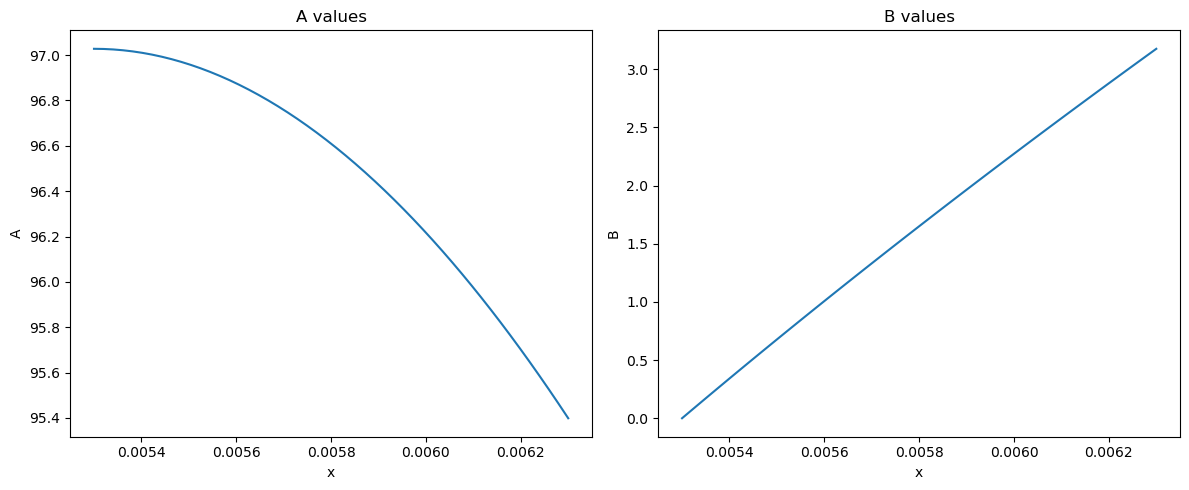

In [54]:
mu_2_val = 1
mu0 = 1.257*10**-6# H/m
J_z_val = Jz_in 
r1 = consts["r1"]
def B_func(r):
    B2 = -B02 / r + 0.5 * J_z_val * mu_2_val * mu0 * r
    return B2 * 1000

def solve_B02():
    # B3 =  0.5 * J_z_val * mu_3_val * mu0* 0.0125**2 
    # B02 = -r1* B3_val[0] * 1000 / mu_2_val
    B02 = 0.5 * mu_2_val * mu0 * J_z_val * r1**2
    # print("B3_val[0]", B3_val[0])
    return B02

def A_func(r):
    A2 = A02 + B02* np.log(r) - (1/4) * mu_2_val * mu0 * J_z_val * r**2
    return A2 * 1e6

def solve_A02():
    # A3 = 1.740e-6 - B03* np.log(r)
    A2 = A3_val[0]/1e6 - B02* np.log(r2) + 1/4 * mu_2_val * mu0 * Jz_in * r2**2
    return A2

B02 = solve_B02()
print("B02", B02)
x_12 = np.linspace(r1, r2)
A02 = solve_A02()
print("A02", A02)

B2_val = B_func(x_12)
A2_val = A_func(x_12)

print("B2:", B2_val[0], B2_val[-1])
print("A2:", A2_val[0], A2_val[-1])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_12, A2_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_12, B2_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


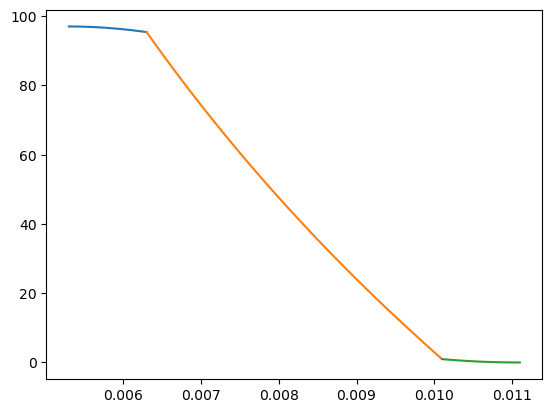

In [55]:
plt.plot(x_12, A2_val)
plt.plot(x_23, A3_val)
plt.plot(x_34, A4_val)

In [56]:
import numpy as np

def find_interface_indices(mesh, interfaces):
    # 将interfaces转换为numpy数组，以便使用searchsorted
    interfaces_array = np.array(interfaces)
    
    # 使用searchsorted找到interfaces中每个元素在mesh中的索引
    indices = np.searchsorted(mesh, interfaces_array, side='left')
    
    # 如果界面值正好是mesh中的值，searchsorted会返回正确的索引
    # 如果界面值在mesh的两个值之间，searchsorted会返回较大值的索引
    # 在这种情况下，可能需要根据具体情况调整索引
    
    return indices

# 示例
mesh = [0.0, 0.0043, 0.0053, 0.0063, 0.0101, 0.0103, 0.0111]  # 假设这是你的网格数组，从0到0.012，共500个点
interfaces = [0.0, 0.0053, 0.0063, 0.0101, 0.0111]  # 这是你的界面列表

# 获取界面在网格中的索引
interface_indices = find_interface_indices(mesh, interfaces)
print(interface_indices)
mesh


[0 2 3 4 6]


[0.0, 0.0043, 0.0053, 0.0063, 0.0101, 0.0103, 0.0111]

In [57]:
import numpy as np
def exact_solution(r, A0=71, muJz=20):
    return A0 - 1/4 * muJz * r**2

# # 随机从0到1之间抽取r的值
r = np.random.uniform(0, 1, size=(1000, 1))  # 假设我们需要1000个样本

# 使用exact_solution函数计算对应的解
A0 = 71
muJz = 20
exact_solution_values = exact_solution(r, A0, muJz)
# 将r和对应的解保存到npy文件中
# np.savez("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/datasets/Poission.npz", r=r, solution=exact_solution_values)



In [58]:
def find_element_interface(mesh_elem, interfaces):
    # mesh_elem 是一个包含两个元素的列表，表示当前元素的起始和结束位置
    for i in range(len(interfaces) - 1):
        # 检查当前元素是否位于第 i 个区间内
        if interfaces[i] <= mesh_elem[0] and mesh_elem[1] <= interfaces[i + 1]:
            return i  # 返回当前元素所在的区间索引
    return None  # 如果没有找到符合条件的区间，则返回 None


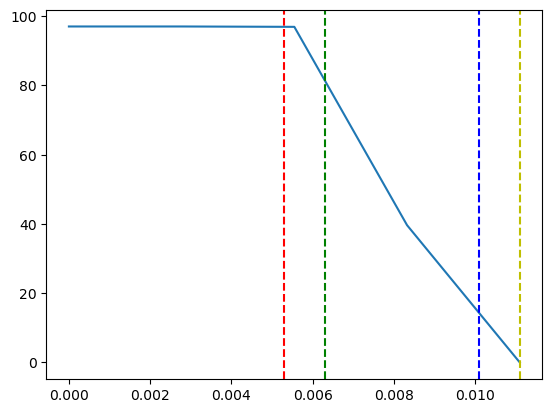

In [60]:
consts = {"r1":0.0053, "r2":0.0063, "r3":0.0101, "r4":0.0111,"Jz_in":1501461.7272820305, "Jz_out":2744050.7429637127, "Params":[{"A":97.02800697374416/1e6, "B":0, "Jz": 0, "mu":1}, {"A": 0.0003751047819995934, "B":4.844502220495115e-05, "Jz":2744050.7429637127, "mu":1 }, {"A":-0.0009183353357741599, "B":-0.00020005776346651235, "Jz":0, "mu":10}, {"A":-0.0005814412979955557, "B":-0.00011626941998447632, "Jz":-1501461.7272820305, "mu":1}] }
r1 = consts["r1"]
r2 = consts["r2"]
r3 = consts["r3"]
r4 = consts["r4"]
def find_region(value):
    r1 = consts["r1"]
    r2 = consts["r2"]
    r3 = consts["r3"]
    r4 = consts["r4"]

    # 判断值落在哪个区间
    if 0 <= value < r1: 
        return int(0)
    elif r1 <= value < r2:
        return int(1)
    elif r2 <= value < r3:
        return int(2)
    elif r3 <= value <= r4:
        return int(3)
    else:
        raise ValueError("Value {} is less than 0 or larger than r4".format(value))

class exact_fn():
    def __init__(self,):
        self.name = "RHS"
        self.scale = [0, 1]
        self.mu = 1
        self.mu0 = 1.257*10**-6 # H/m
        self.Jz = -1326291.1924324587
        self.B0 = -0.0001302459397568438
        self.A0 = -0.0006358641469510412

    def __call__(self, x):
        x = np.array(x)  
        result = np.zeros_like(x)
        
        for i in range(len(x)):
            x_ = x[i]
            # print(x_)
            region = find_region(x_)
            Param = consts["Params"][region]
            A0 = Param["A"]
            B0 = Param["B"]
            mu = Param["mu"]
            Jz = Param["Jz"]
            muJz = mu * self.mu0 * Jz
            if x_ == 0:
                func1 = A0 - 1/4 * muJz * x_**2 
            else:
                func1 = A0 + B0*np.log(x_) - 1/4 * muJz * x_**2 
            result[i] = func1
        return result * 1e6

exact_func = exact_fn()
x_data = np.linspace(0, consts["r4"], 5)
y_data = exact_func(x_data)
plt.plot(x_data, y_data)
# 画出竖线
plt.axvline(x=r1, color='r', linestyle='--', label='r1')  # 红色虚线
plt.axvline(x=r2, color='g', linestyle='--', label='r2')  # 绿色虚线
plt.axvline(x=r3, color='b', linestyle='--', label='r3')  # 蓝色虚线
plt.axvline(x=r4, color='y', linestyle='--', label='r4')  # 黄色虚线

y_data[0]

np.savez("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe_nutils/datasets/Poission.npz", r=x_data, solution=y_data)




In [62]:
import numpy as np

def generate_data(num_points=1000):
    interfaces_global = [0, 0.0053, 0.0063, 0.0101, 0.0111]
    
    # 初始化x_train为空列表
    x_train = []
    
    # 遍历interfaces_global列表中的每个区间
    for start, end in zip(interfaces_global[:-1], interfaces_global[1:]):
        # 在当前区间内生成num_points个均匀分布的数据点
        # 由于每对接口之间都生成相同数量的点，最终点的数量会是(num_points - 1) * (区间数) + 1
        # 这是因为每个区间的结束点与下一个区间的开始点重合
        # linspace的第三个参数是需要生成的点的数量，这里我们为每个区间生成num_points个点
        # 但为了避免区间之间的重复点，我们在除了最后一个区间外的每个区间的结束处都减去一个点
        points = np.linspace(start, end, num_points, endpoint=False)
        
        # 将生成的点添加到x_train列表中
        x_train.extend(points)
    
    # 对于最后一个区间，我们需要包括结束点，因此再次生成点并添加到x_train
    x_train.extend(np.linspace(interfaces_global[-2], interfaces_global[-1], num_points))
    
    # 将x_train转换为NumPy数组
    x_train = np.array(x_train)
    
    return x_train

# 生成数据
x_train = generate_data(num_points=2)
print(x_train)

# 输出x_train的长度和一些值进行检查
print(f"Total number of points: {len(x_train)}")
print(f"Sample points: {x_train[:10]}")


[0.      0.00265 0.0053  0.0058  0.0063  0.0082  0.0101  0.0106  0.0101
 0.0111 ]
Total number of points: 10
Sample points: [0.      0.00265 0.0053  0.0058  0.0063  0.0082  0.0101  0.0106  0.0101
 0.0111 ]
